Apenas para teste

# Módulo 2 - Técnicas de Programação II
## Aula 3
- Gráficos com Matplotlib
- Exercícios

## Gráficos com Matplotlib
O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.  
Devido a sua alta qualidade e simplicidade de uso é a biblioteca gráfica mais popular para análise de dados. 
  
**Documentação**: https://matplotlib.org/

### Instalação
Caso já tenha instalado o pacote do **Matplotlib** ou está na dúvida, basta rodar o seguinte código:

In [39]:
import matplotlib

Se este código não rodou por erro ou se você não possui este pacote, para obtê-lo é simples, rode a célula abaixo

In [40]:
!pip install matplotlib

### Import da biblioteca
  
Para utilizarmos o matplotlib importamos o submódulo **pyplot** conforme podem observar na célula abaixo.

In [41]:
import matplotlib.pyplot as plt

O conjunto de funções disponível em **matplotlib.pyplot** permite a criação de uma figura, uma área para exibir o gráfico na figura, desenho de linhas na área do gráfico, decoração do gráfico com rótulos, etc. A sintaxe utilizada é semelhante ao MATLAB.  
   
Para simplificar o trabalho ainda mais, o pyplot já inicia com uma figura e área de desenho padrão, que você não precisa definir, e assim o código para gerar um gráfico pode ser simplesmente:

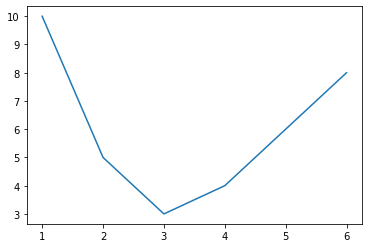

In [42]:
a = [1, 2, 3, 4, 5 ,6]
b = [10, 5, 3, 4, 6, 8]
plt.plot(a, b)
plt.show()

Para não haver necessidade de rodar o comando **plt.show()** em todas as plotagens de gráficos utilizamos uma função mágica do matplotlib cujo objetivo é de que a saída dos comandos de plotagem é exibida em linha diretamente abaixo da célula de código que o produziu.

In [43]:
%matplotlib inline

Vamos importar também outros pacotes padrões

In [44]:
import pandas as pd
import numpy as np

## Scatter (dispersão)
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

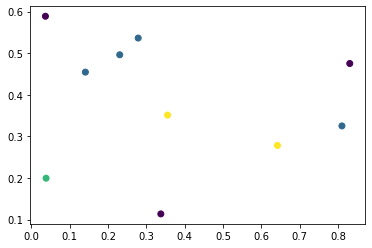

In [45]:
x = np.random.rand(10)
y = np.random.rand(10)
color = [1, 1, 2, 2, 2, 2, 3, 4, 1, 4]
plt.scatter(x=x, y=y, c=color);

Importando o dataset dos pinguins

In [46]:
df_size = pd.read_csv(r'C:\Users\Guilerme\Repositórios de códigos\repo-pessoal-topcoders-1\Aulas\módulo 4\dados\penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Para plotagem dos gráficos existem duas formas básicas:
1. Passar nos eixos X e Y tanto as colunas quanto o dataframe no formato df['coluna'] 
2. Passar apenas a string com nome das colunas para os parâmetros X e Y e o dataframe no parâmetro data

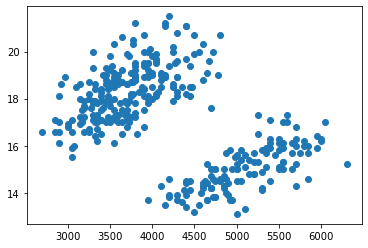

In [47]:
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

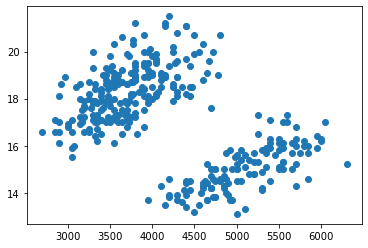

In [48]:
plt.scatter('body_mass_g', 'culmen_depth_mm', data=df_size);

É possíve verificar a diferença entre as plotagens através do Pandas e Matplotlib por meio do código abaixo.

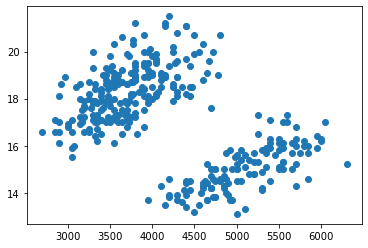

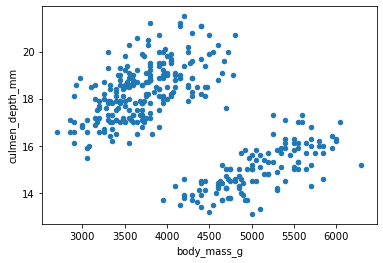

In [49]:
#Matplotlib
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm'])
#Pandas
df_size.plot(x='body_mass_g', y='culmen_depth_mm', kind='scatter');

Nota-se que visualmente não há muita diferença, porém a sintaxe que gera os gráficos possui certas diferenças.

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  
  
Por padrão o parâmetro *c* do scatter necessita de uma lista apenas com cores ou números. Como no nosso dataframe as categorias são MALE, FEMALE e NaN, apenas alteramos estes valores para 0, 1 e 2. 

In [50]:
df_size['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [51]:
df_size['sex'].isnull().sum()

10

Para simplificar iremos excluir os valores NaN

In [52]:
df_tratado_sex = df_size.dropna(subset=['sex'])

In [53]:
df_tratado = df_size.dropna()

In [54]:
df_tratado['sex'].isnull().sum()

0

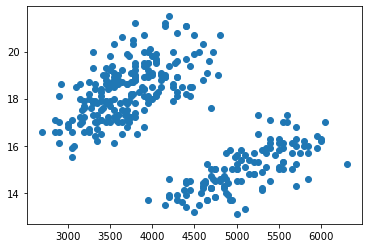

In [55]:
plt.scatter(x=df_tratado['body_mass_g'], y=df_tratado['culmen_depth_mm']);

Utilizaremos a função LabelEncoder responsável por fazer a transformação das categorias em números para possibilitar a leitura do matplotlib.

In [56]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_tratado['sex_encoded'] = le.fit_transform(df_tratado['sex'])

C:\Users\Guilerme\AppData\Local\Temp\ipykernel_11068\474086873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tratado['sex_encoded'] = le.fit_transform(df_tratado['sex'])


In [57]:
df_tratado.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,2


In [58]:
df_tratado['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [59]:
df_tratado['sex_encoded'].value_counts()

2    168
1    165
0      1
Name: sex_encoded, dtype: int64

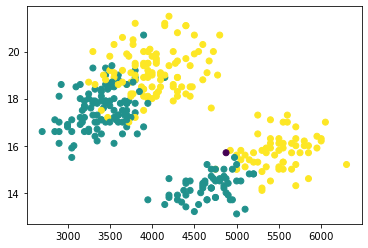

In [60]:
ax = plt.scatter(x=df_tratado['body_mass_g'], y=df_tratado['culmen_depth_mm'], c=df_tratado['sex_encoded']);

Ajustando o tamanho da figura na qual o gráfico será plotado

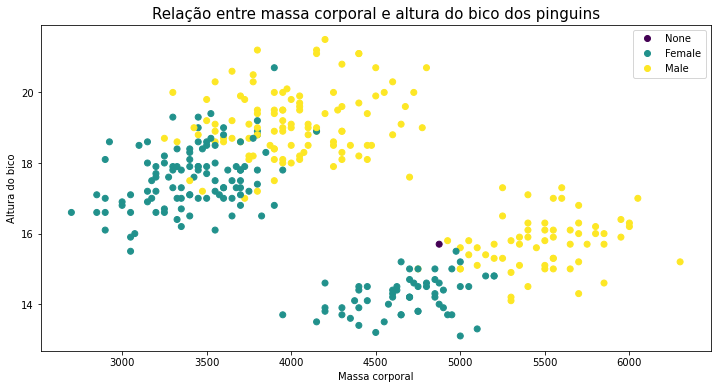

In [61]:
plt.figure(figsize=(12,6))

ax = plt.scatter(x=df_tratado['body_mass_g'], y=df_tratado['culmen_depth_mm'], c=df_tratado['sex_encoded'])
plt.legend(handles=ax.legend_elements()[0], labels=['None', 'Female', 'Male'])

plt.xlabel('Massa corporal')
plt.ylabel('Altura do bico')
plt.title('Relação entre massa corporal e altura do bico dos pinguins', fontsize=15);

## Linhas
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [62]:
df_vendas = pd.DataFrame({'Mês' : ['Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr', 'Jan', 'Fev', 'Mar', 'Abr'],
                         'Quantidade' : np.random.randint(low=100, size=12),
                          'Veículo' : np.repeat(['HB20', 'Onix', 'Sandero'],4)})
df_vendas.head()

,Mês,Quantidade,Veículo
0,Jan,28,HB20
1,Fev,67,HB20
2,Mar,93,HB20
3,Abr,43,HB20
4,Jan,92,Onix


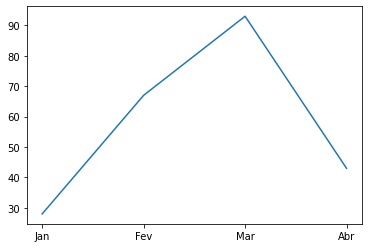

In [63]:
plt.plot(df_vendas[df_vendas['Veículo']=='HB20']['Mês'], df_vendas[df_vendas['Veículo']=='HB20']['Quantidade']);

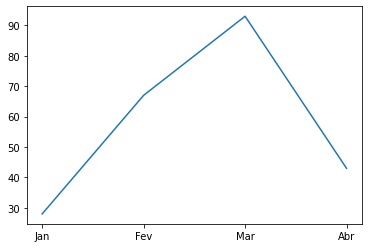

In [64]:
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20']);

### Estrutura  
No matplotlib, temos dois conceitos importantes:  
  
* Área de plotagem (eixos ou Axes)
    área onde os gráficos (linhas, barras, pontos, labels, ticks, etc) aparecem. Cada Axes possui um eixo-x e eixo-y.
* Figure
    é o container de nível superior que mantém toda a estrutura. É a janela onde tudo é desenhado e controlado. Dentro dele podemos ter vários gráficos independentes.
  
  
Antes de gerarmos múltiplos gráficos, precisamos decidir:

* podemos imprimir dois gráficos, ex: duas linhas, na mesma área de plotagem
* ou em áreas de plotagens diferentes.

**No mesmo Eixo**

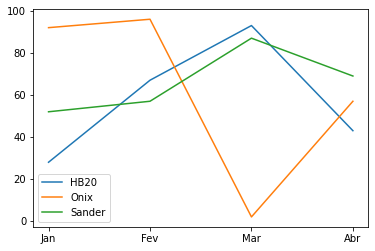

In [65]:
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], label='HB20')
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], label='Onix')
plt.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], label='Sander')

plt.legend();

**Em vários eixos**  
Para plotar os gráficos em vários eixos utilizaresmos o método *plt.subplots*, cuja função é gerar uma figura e um conjunto de eixos pré-posicionados num formato de grade.  
  
Para isso, ao chamarmos essa função, iremos passar dois argumentos:
* nrows: indica quantas linhas. 
* ncols: indinca quantas colunas.
  
No exemplo abaixo teremos 4 gráficos sendo, portanto, 2 linhas e 2 colunas. Desta forma, retornará uma tupla de dois elementos:  
  
* um objeto do tipo Figure que representa a figura  
* lista ou matriz de eixos  
  
Podemos acessar cada eixo usando a notação de colchetes, e invocar a função de plot normalmente.

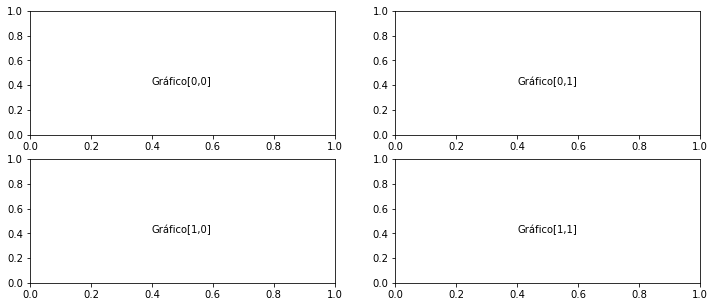

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(12,5))

axs[0,0].text(0.4, 0.4, 'Gráfico[0,0]')
axs[0,1].text(0.4, 0.4, 'Gráfico[0,1]')
axs[1,0].text(0.4, 0.4, 'Gráfico[1,0]')
axs[1,1].text(0.4, 0.4, 'Gráfico[1,1]');

No exemplo de vendas temos 3 gráficos, por isso é possível fazer os subplots com 3 linhas e 1 coluna ou 1 linha e 3 colunas. Aqui, seguiremos com o segundo casO (1 linha e 3 colunas).  

Repare que ao passar nrows=1, espertamente, o matplotlib não devolve uma matriz e sim uma lista.  

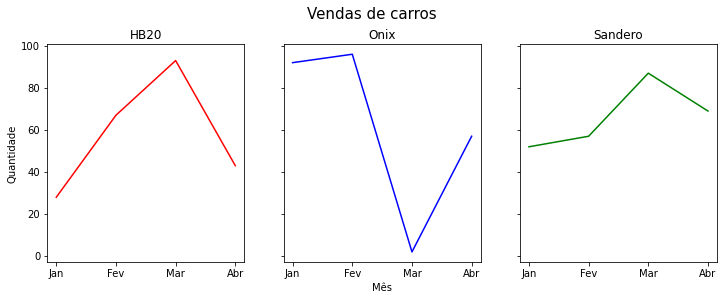

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)

fig.suptitle('Vendas de carros', fontsize=15, y=1.01)
axs[0].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', label = 'HB20')
axs[1].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', label = 'Onix')
axs[2].plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', label = 'Sandero')

axs[0].set(ylabel='Quantidade', title='HB20')
axs[1].set(xlabel='Mês', title='Onix')
axs[2].set(title='Sandero');

Para diferenciarmos os gráficos podemos utilizar os parâmetros linewidth, linestyle e color. Estes parâmetros podem ser utilizados por meio de abreviações de linewidth = lw, linestyle = ls e color = c.

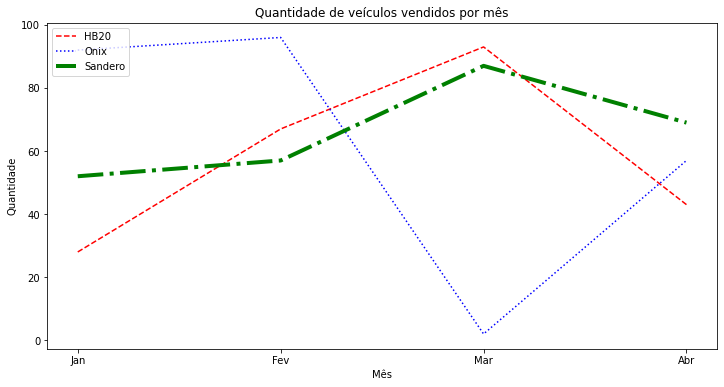

In [68]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='HB20'], c='red', ls='--', label='HB20')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Onix'], c='blue', ls=':', label='Onix')
ax.plot('Mês', 'Quantidade', data=df_vendas[df_vendas['Veículo']=='Sandero'], c='green', ls='-.', label='Sandero', lw=4);

ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de veículos vendidos por mês')

ax.legend(loc='upper left');

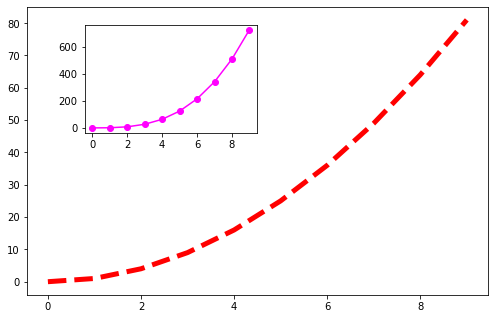

In [69]:
x = range(10)
y1 = [n ** 2 for n in x]
y2 = [n ** 3 for n in x]

figure = plt.figure(figsize=(8,5))

ax1 = figure.add_axes([0.1, 0.05, 0.8, 0.8])
ax2 = figure.add_axes([0.2, 0.5, 0.3, 0.3])
ax1.plot(x, y1, c='red', ls='--', lw=5)
ax2.plot(x, y2, c='#FF00FF', marker='o')
plt.show()

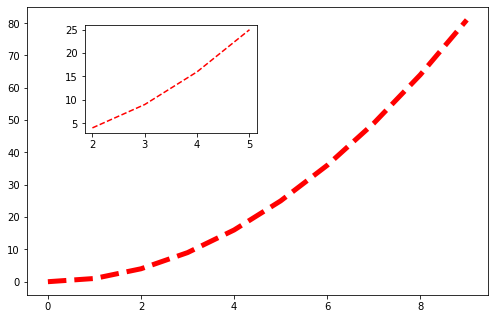

In [70]:
x = range(10)
x2 = range(2, 6)
y1 = [n ** 2 for n in x]
y2 = [n ** 2 for n in x2]

figure = plt.figure(figsize=(8,5))

ax1 = figure.add_axes([0.1, 0.05, 0.8, 0.8])
ax2 = figure.add_axes([0.2, 0.5, 0.3, 0.3])
ax1.plot(x, y1, c='red', ls='--', lw=5)
ax2.plot(x2, y2, c='red', ls='--')
plt.show()

Para utilizar cores hexadecimal é possível consultar alguns códigos no link https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [71]:
df_veiculo = df_vendas.pivot_table(index='Veículo', values='Quantidade', aggfunc='sum')
df_veiculo.head()

,Quantidade
Veículo,
HB20,231
Onix,247
Sandero,265


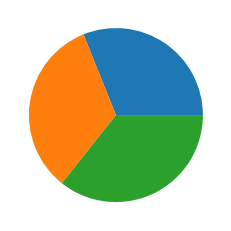

In [72]:
plt.pie('Quantidade', data=df_veiculo);

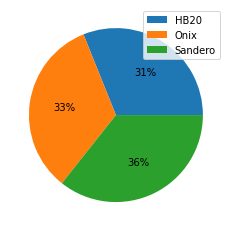

In [73]:
plt.pie('Quantidade', data=df_veiculo, autopct='%1.0f%%')
plt.legend(labels=['HB20', 'Onix', 'Sandero']);

In [74]:
df_vendas['Mês'] = pd.Categorical(df_vendas['Mês'], categories=["Jan", "Fev", "Mar", "Abr"], ordered=True)
df_mes = df_vendas.pivot_table(index='Mês', values='Quantidade', aggfunc='sum')
df_mes.head()

,Quantidade
Mês,
Jan,172
Fev,220
Mar,182
Abr,169


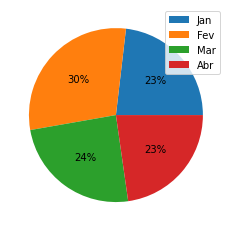

In [75]:
plt.pie('Quantidade', data=df_mes, autopct='%1.0f%%')
plt.legend(labels=['Jan', 'Fev', 'Mar', 'Abr']);

## Barras
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

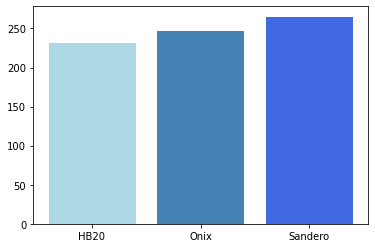

In [76]:
plt.bar(df_veiculo.index, df_veiculo['Quantidade'], color=['#ADD8E6', '#4682B4', '#4169E1']);

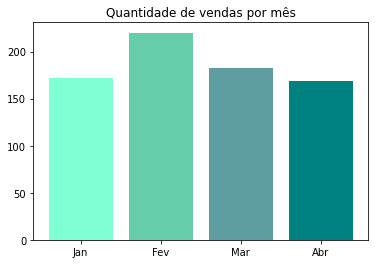

In [77]:
ax = plt.bar(df_mes.index, df_mes['Quantidade'], color=['#7FFFD4', '#66CDAA', '#5F9EA0', '#008080'])
plt.title('Quantidade de vendas por mês');

**Barras Horizontais**

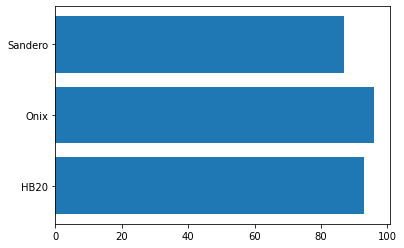

In [78]:
plt.barh(df_vendas['Veículo'], df_vendas['Quantidade']);

## Histograma
**Documentação**: https://matplotlib.org/stable/gallery/statistics/hist.html

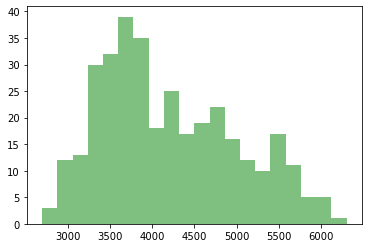

In [79]:
plt.hist(bins=20, x=df_size['body_mass_g'], alpha=0.5, color='green');

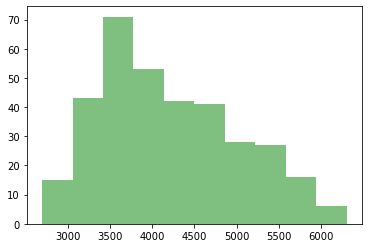

In [80]:
fig, ax = plt.subplots()
graf = ax.hist(x=df_size['body_mass_g'], alpha=0.5, color='green');

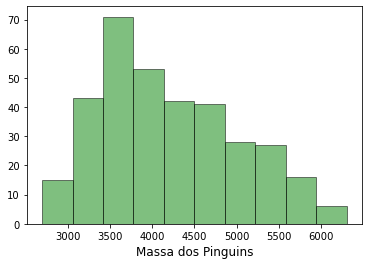

In [81]:
plt.hist(df_size['body_mass_g'], alpha=0.5, color='green', edgecolor='black')
plt.xlabel('Massa dos Pinguins', fontsize=12);

## Boxplot
**Documentação**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

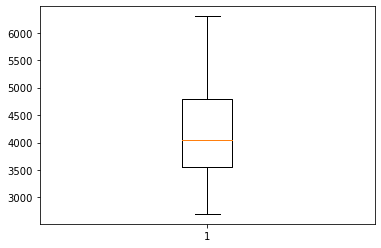

In [82]:
plt.boxplot(df_tratado['body_mass_g']);

## Exercício
Agora é hora de praticar!  
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?

Importe a base **Loan_Default.csv** que está em csv dentro do diretório **data**.

Verifique com a função .info os campos presentes na tabela

Imprima as estatísticas padrões do dataframe com a função .describe

### Gráficos

1) Verifique sua variável de interesse (Status) como a contagem de distribuição

2) Construa um gráfico de barras que permita verificar a Bad Rate (média da coluna Status) por tipo de crédito oferecido (credit_type). 

3) Faça um gráfico de dispersão da Credit Score pela média do Status

4) Por meio de um gráfico de dispersão, identifique o comportamento da média da variável de interesse (Status) por faixa etária

5) Construa o histograma do montante de dívida (loan_amount) e verifique como está sua distribuição. Observe o mesmo com um gráfico boxplot.

6) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*